# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
file_name = 'lab6.zip'
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
file_url = 'https://github.com/msaricaumbc/DS601_Fall21/raw/main/Week06/data/lab_data.zip'
download_file(file_name,file_url)


In [2]:
from zipfile import ZipFile

In [3]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 


In [4]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


## Reading data from a csv file

In [5]:
## Your code is here
import pandas as pd
df = pd.read_csv('PoliceShootingsUS.csv', encoding= 'windows-1252')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [6]:
over_55  = df[df['age'] > 55]
over_55.shape


(235, 14)

* What's the age distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A70F95AC0>]],
      dtype=object)

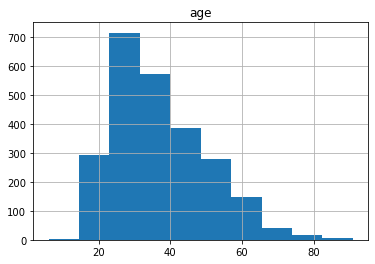

In [7]:
df.hist('age')

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [15]:
## Your code is here
!$ head volunteers.txt

'$' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
names = []
lastnames = []
states = []
with open('volunteers.txt','r') as file:
    lines=file.readlines()
    for line in lines:
        line=line \
                .replace('"',',') \
                .replace("[",',') \
                .replace(']',',') \
                .replace('(',',') \
                .replace(')',',') \
                .replace('-',',') \
        
#         print (line)
        parts = line.split(',')
        lastname = parts[3].strip()
        name = parts[4].strip()
        state  = parts[6].strip() 
        
        
        names.append(name)
        states.append(state)
        lastnames.append(lastname)
        
df = pd.DataFrame()
df['names'] = names
df['lastnames'] = lastnames
df['states'] = states
df

,names,lastnames,states
0,Christine,Harding,Virginia
1,Kimberly,Davis,New York
2,Rachel,Ingram,Louisiana
3,Richard,Walker,Oregon
4,Francisco,Barnes,Virginia
...,...,...,...
95,Kevin,Smith,North Dakota
96,Mark,Moore,Alaska
97,Jennifer,Landry,Wyoming
98,Lori,Phillips,Arkansas
